In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

from keras.models import Model,Sequential
from keras.layers import Input,Dense,LSTM,Bidirectional
from keras import backend as K
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM 

In [3]:
data = pd.read_csv('/content/drive/My Drive/데이터수집/2010년부터10년치데이터.csv',index_col=0)
data

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2010-01-04,7540,7820,7480,7520,177197,-0.007916
2010-01-05,7490,7580,7350,7500,214314,-0.002660
2010-01-06,7500,7500,7320,7350,81874,-0.020000
2010-01-07,7350,7420,7200,7210,106474,-0.019048
2010-01-08,7220,7330,7220,7240,61393,0.004161
...,...,...,...,...,...,...
2020-10-21,20200,20500,19850,20100,402212,-0.009852
2020-10-22,19850,20050,19000,19200,620779,-0.044776
2020-10-23,19500,20600,19350,19800,567794,0.031250


In [4]:
target = data['Close']

In [ ]:
list(target.values)[-1]

17500

In [5]:
aa=[]

aa.extend(list(target.values[1:-1]))
aa.append('17500')
aa.append('0')
len(aa)

2669

In [ ]:
len(target.values[1:-1])

2667

In [6]:
from pandas import Series

y_target= pd.DataFrame(data=aa,index=target.index,columns=['Close'])
y_target  # 그 다음날 종가

,Close
Date,
2010-01-04,7500
2010-01-05,7350
2010-01-06,7210
2010-01-07,7240
2010-01-08,7100
...,...
2020-10-21,19200
2020-10-22,19800
2020-10-23,17100


In [7]:
x_data = data[['Open','High','Low','Volume']] # 학습
y_data = y_target # 답

In [8]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

x_datas = StandardScaler().fit_transform(x_data)
y_datas = StandardScaler().fit_transform(y_data)

In [9]:
# 데이터 분리하기
x_train = x_datas[:2160]
x_test = x_datas[2160:]

y_train = y_datas[:2160]
y_test = y_datas[2160:]

In [ ]:
y_train.shape

(2160, 1)

In [ ]:
x_train.shape

(2160, 1, 4)

In [10]:
x_train = x_train.reshape((2160,-1,4))

In [ ]:
x_train.ndim

3

In [22]:
x_test = x_test.reshape((509,-1,4))
y_test = y_test.reshape((509,-1,1))

In [12]:
x_test.shape,y_test.shape

((509, 1, 4), (509, 1, 1))

In [13]:
# 모델 구성
model = Sequential()

# model.add(Dense(units=1024, input_dim=4, activation='relu'))
# model.add(Dense(units=512, activation='relu'))
# model.add(Dense(units=256, activation='relu'))
# model.add(Dense(units=128, activation='relu'))
# model.add(Dense(units=64, activation='relu'))
# model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=1))

model.add(LSTM(64,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dense(1))

In [14]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])

In [15]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=1)

hist = model.fit(x_train,y_train,epochs=100,batch_size=16,callbacks=[es])

Epoch 1/100
135/135 [==============================] - 0s 2ms/step - loss: 0.1267 - mae: 0.2531
Epoch 2/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0040 - mae: 0.0419
Epoch 3/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0037 - mae: 0.0407
Epoch 4/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0037 - mae: 0.0404
Epoch 5/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0036 - mae: 0.0403
Epoch 6/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0036 - mae: 0.0404
Epoch 7/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0036 - mae: 0.0401
Epoch 8/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0036 - mae: 0.0401
Epoch 9/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0036 - mae: 0.0400
Epoch 10/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0035 - mae: 0.0399
Epoch 11/100
135/135 [=================

In [16]:
res = model.evaluate(x_test,y_test,batch_size=16)

32/32 [==============================] - 0s 1ms/step - loss: 0.3023 - mae: 0.2353


In [17]:
x_hat = x_test
y_hat = model.predict(x_hat)

In [28]:
x_test.shape,y_hat.shape,y_test.shape

((509, 1, 4), (509, 1), (509, 1, 1))

In [ ]:
y_test.reshape((509,1))

ValueError: ignored

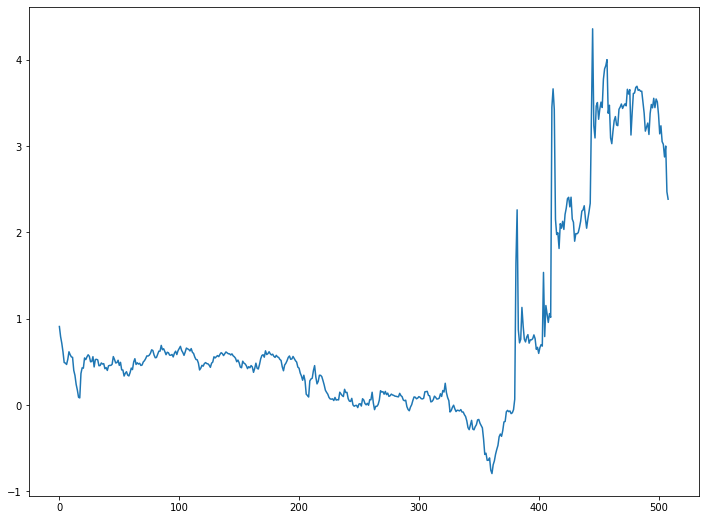

In [32]:
plt.figure(figsize=(12,9))
plt.plot(y_hat, label = "predicted")
plt.plot(y_test,label = "actual")
plt.legend()
plt.show()